# 回帰

サンプルデータから回帰し、フィットする（前後関係ない）

## まず、決まった関数でサンプルデータを作成しよう

※：今回は関数で作成しても、センサーなどで取得したデータとして考えてください～

In [1]:
import math
import numpy as np

# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    y += np.random.normal(0, 0.2)  # 少しノイズを加える
    return y


# 信号を生成
def generate_signal(dropout):
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-3, 3, 0.025):
    
        # ランダムにデータが失う
        if np.random.random_sample() < dropout:
            continue
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

In [2]:
data_x, data_y = generate_signal(0.5)

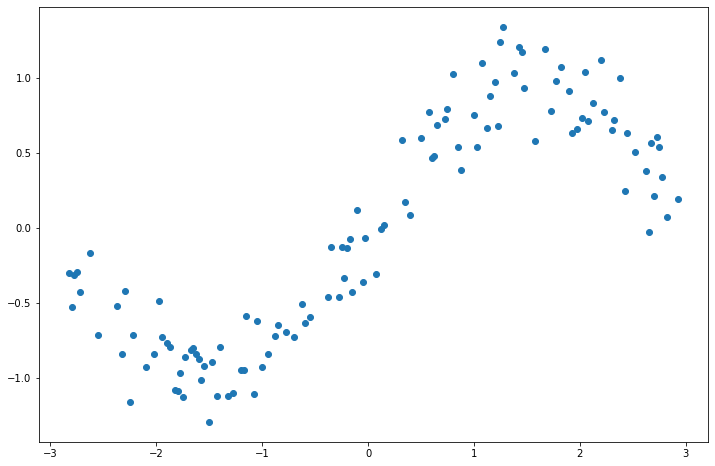

In [3]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

## モデルを作成

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

def create_model():
    
    lyr_input = Input(shape=(1,))
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_input)
    lyr_hiddn = Dense(units=16, activation="tanh")(lyr_hiddn)
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_hiddn)
    lyr_outpt = Dense(units=1, activation="tanh")(lyr_hiddn)
    
    model = Model(inputs=lyr_input, outputs=lyr_outpt)
    model.summary()
    
    #回帰の場合は誤差を減らしたいため、mseはOK
    model.compile(optimizer="adam", loss="mse")
    
    return model
    
model = create_model()

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


## データを前処理し、学習しましょう！

In [5]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

In [6]:
model.fit(data_x, prep_y, epochs=1000)

Epoch 1/1000
118/118 [==============================] - 0s 888us/step - loss: 0.2536
Epoch 2/1000
118/118 [==============================] - 0s 42us/step - loss: 0.2159
Epoch 3/1000
118/118 [==============================] - 0s 42us/step - loss: 0.1898
Epoch 4/1000
118/118 [==============================] - 0s 59us/step - loss: 0.1646
Epoch 5/1000
118/118 [==============================] - 0s 42us/step - loss: 0.1374
Epoch 6/1000
118/118 [==============================] - 0s 43us/step - loss: 0.1147
Epoch 7/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0964
Epoch 8/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0800
Epoch 9/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0663
Epoch 10/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0554
Epoch 11/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0471
Epoch 12/1000
118/118 [==============================] - 0s 59us/step - l

118/118 [==============================] - 0s 42us/step - loss: 0.0077
Epoch 98/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0076
Epoch 99/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0076
Epoch 100/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0076
Epoch 101/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0075
Epoch 102/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0075
Epoch 103/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0074
Epoch 104/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0074
Epoch 105/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0074
Epoch 106/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0073
Epoch 107/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0073
Epoch 108/1000
118/118 [==============================] - 0s 59us/step 

118/118 [==============================] - 0s 34us/step - loss: 0.0068
Epoch 193/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0069
Epoch 194/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0068
Epoch 195/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0068
Epoch 196/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0067
Epoch 197/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0068
Epoch 198/1000
118/118 [==============================] - 0s 25us/step - loss: 0.0067
Epoch 199/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0068
Epoch 200/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0068
Epoch 201/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0068
Epoch 202/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0068
Epoch 203/1000
118/118 [==============================] - 0s 34us/ste

118/118 [==============================] - 0s 42us/step - loss: 0.0064
Epoch 288/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0065
Epoch 289/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0065
Epoch 290/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0066
Epoch 291/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0066
Epoch 292/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0065
Epoch 293/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0065
Epoch 294/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0066
Epoch 295/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0067
Epoch 296/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0064
Epoch 297/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0066
Epoch 298/1000
118/118 [==============================] - 0s 34us/ste

118/118 [==============================] - 0s 25us/step - loss: 0.0061
Epoch 383/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0061
Epoch 384/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0061
Epoch 385/1000
118/118 [==============================] - 0s 25us/step - loss: 0.0061
Epoch 386/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0061
Epoch 387/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0062
Epoch 388/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0061
Epoch 389/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0061
Epoch 390/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0060
Epoch 391/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0061
Epoch 392/1000
118/118 [==============================] - 0s 25us/step - loss: 0.0062
Epoch 393/1000
118/118 [==============================] - 0s 51us/ste

118/118 [==============================] - 0s 51us/step - loss: 0.0059
Epoch 478/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0058
Epoch 479/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0057
Epoch 480/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0057
Epoch 481/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0057
Epoch 482/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0057
Epoch 483/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0057
Epoch 484/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0059
Epoch 485/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0058
Epoch 486/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0057
Epoch 487/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0057
Epoch 488/1000
118/118 [==============================] - 0s 42us/ste

118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 573/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0055
Epoch 574/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0054
Epoch 575/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0055
Epoch 576/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0058
Epoch 577/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0055
Epoch 578/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0056
Epoch 579/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0057
Epoch 580/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 581/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0056
Epoch 582/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0058
Epoch 583/1000
118/118 [==============================] - 0s 42us/ste

118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 668/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 669/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 670/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 671/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 672/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0054
Epoch 673/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 674/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0053
Epoch 675/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 676/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0056
Epoch 677/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 678/1000
118/118 [==============================] - 0s 34us/ste

118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 763/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0053
Epoch 764/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0053
Epoch 765/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 766/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 767/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0053
Epoch 768/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 769/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0053
Epoch 770/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 771/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0053
Epoch 772/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 773/1000
118/118 [==============================] - 0s 42us/ste

118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 858/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 859/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0053
Epoch 860/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 861/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0055
Epoch 862/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0053
Epoch 863/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0055
Epoch 864/1000
118/118 [==============================] - 0s 59us/step - loss: 0.0054
Epoch 865/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0053
Epoch 866/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0053
Epoch 867/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 868/1000
118/118 [==============================] - 0s 34us/ste

118/118 [==============================] - 0s 42us/step - loss: 0.0053
Epoch 953/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0053
Epoch 954/1000
118/118 [==============================] - 0s 25us/step - loss: 0.0054
Epoch 955/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 956/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 957/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 958/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0054
Epoch 959/1000
118/118 [==============================] - 0s 42us/step - loss: 0.0054
Epoch 960/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0053
Epoch 961/1000
118/118 [==============================] - 0s 34us/step - loss: 0.0053
Epoch 962/1000
118/118 [==============================] - 0s 51us/step - loss: 0.0055
Epoch 963/1000
118/118 [==============================] - 0s 25us/ste

In [7]:
#推定
pred_y = model.predict(data_x)

In [8]:
# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

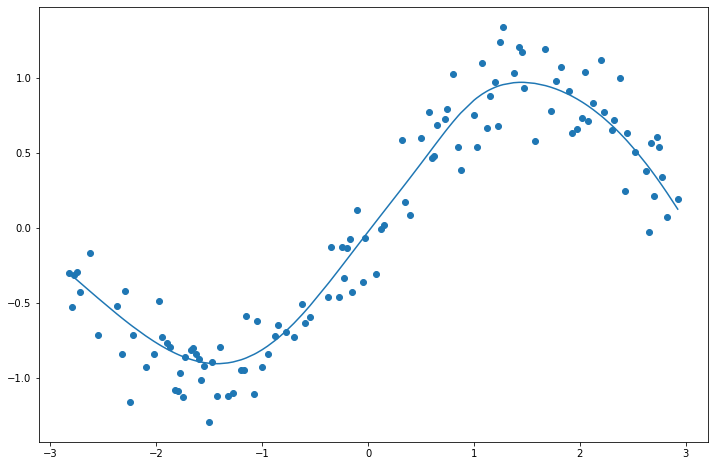

In [9]:
#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(data_x, pred_y)

## 他の関数はどう？

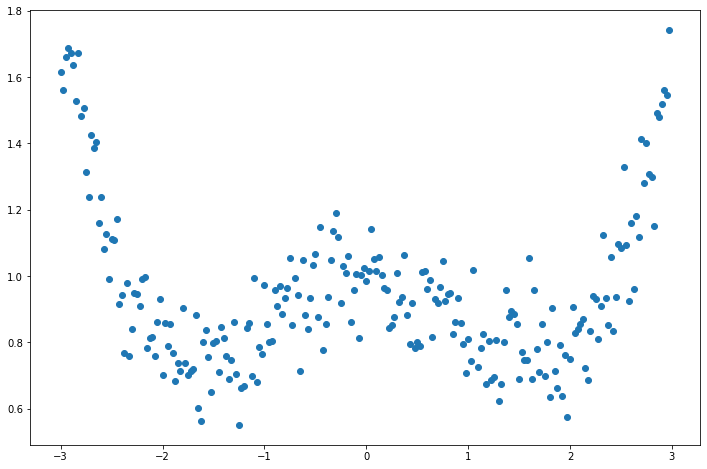

In [18]:
# 数値を作る関数
def gen_function(x):
    y = math.cos(x) + 0.3 * (x * x)
    y += np.random.normal(0, 0.1)  # 少しノイズを加える
    return y

data_x, data_y = generate_signal(0.01)

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [19]:
model = create_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_14 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [20]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, epochs=1000)

Epoch 1/1000
239/239 [==============================] - 0s 409us/step - loss: 0.1786
Epoch 2/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0839
Epoch 3/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0665
Epoch 4/1000
239/239 [==============================] - 0s 37us/step - loss: 0.0501
Epoch 5/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0480
Epoch 6/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0479
Epoch 7/1000
239/239 [==============================] - 0s 37us/step - loss: 0.0467
Epoch 8/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0462
Epoch 9/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0457
Epoch 10/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0453
Epoch 11/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0453
Epoch 12/1000
239/239 [==============================] - 0s 25us/step - l

239/239 [==============================] - 0s 38us/step - loss: 0.0352
Epoch 98/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0356
Epoch 99/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0350
Epoch 100/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0354
Epoch 101/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0347
Epoch 102/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0347
Epoch 103/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0346
Epoch 104/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0345
Epoch 105/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0345
Epoch 106/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0345
Epoch 107/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0341
Epoch 108/1000
239/239 [==============================] - 0s 29us/step 

239/239 [==============================] - 0s 33us/step - loss: 0.0204
Epoch 192/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0210
Epoch 193/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0197
Epoch 194/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0190
Epoch 195/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0188
Epoch 196/1000
239/239 [==============================] - 0s 25us/step - loss: 0.0185
Epoch 197/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0185
Epoch 198/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0189
Epoch 199/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0190
Epoch 200/1000
239/239 [==============================] - 0s 25us/step - loss: 0.0183
Epoch 201/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0188
Epoch 202/1000
239/239 [==============================] - 0s 25us/ste

239/239 [==============================] - 0s 46us/step - loss: 0.0128
Epoch 287/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0130
Epoch 288/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0133
Epoch 289/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0139
Epoch 290/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0141
Epoch 291/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0135
Epoch 292/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0153
Epoch 293/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0139
Epoch 294/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0135
Epoch 295/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0135
Epoch 296/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0132
Epoch 297/1000
239/239 [==============================] - 0s 33us/ste

239/239 [==============================] - 0s 54us/step - loss: 0.0131
Epoch 382/1000
239/239 [==============================] - 0s 46us/step - loss: 0.0129
Epoch 383/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0120
Epoch 384/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0120
Epoch 385/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0119
Epoch 386/1000
239/239 [==============================] - 0s 46us/step - loss: 0.0116
Epoch 387/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0116
Epoch 388/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0118
Epoch 389/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0123
Epoch 390/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0120
Epoch 391/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0118
Epoch 392/1000
239/239 [==============================] - 0s 42us/ste

239/239 [==============================] - 0s 33us/step - loss: 0.0112
Epoch 477/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0113
Epoch 478/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0112
Epoch 479/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0116
Epoch 480/1000
239/239 [==============================] - 0s 50us/step - loss: 0.0115
Epoch 481/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0113
Epoch 482/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0113
Epoch 483/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0111
Epoch 484/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0115
Epoch 485/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0113
Epoch 486/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0111
Epoch 487/1000
239/239 [==============================] - 0s 33us/ste

239/239 [==============================] - 0s 33us/step - loss: 0.0118
Epoch 572/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0133
Epoch 573/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0130
Epoch 574/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0108
Epoch 575/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0107
Epoch 576/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0106
Epoch 577/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0106
Epoch 578/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0110
Epoch 579/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0119
Epoch 580/1000
239/239 [==============================] - 0s 25us/step - loss: 0.0106
Epoch 581/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0104
Epoch 582/1000
239/239 [==============================] - 0s 29us/ste

239/239 [==============================] - 0s 33us/step - loss: 0.0104
Epoch 667/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0104
Epoch 668/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0111
Epoch 669/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0109
Epoch 670/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0106
Epoch 671/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0101
Epoch 672/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0102
Epoch 673/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0100
Epoch 674/1000
239/239 [==============================] - 0s 25us/step - loss: 0.0108
Epoch 675/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0105
Epoch 676/1000
239/239 [==============================] - 0s 25us/step - loss: 0.0102
Epoch 677/1000
239/239 [==============================] - 0s 33us/ste

239/239 [==============================] - 0s 33us/step - loss: 0.0112
Epoch 762/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0105
Epoch 763/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0099
Epoch 764/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0100
Epoch 765/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0095
Epoch 766/1000
239/239 [==============================] - 0s 25us/step - loss: 0.0099
Epoch 767/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0097
Epoch 768/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0107
Epoch 769/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0097
Epoch 770/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0095
Epoch 771/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0095
Epoch 772/1000
239/239 [==============================] - 0s 29us/ste

239/239 [==============================] - 0s 33us/step - loss: 0.0096
Epoch 857/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0099
Epoch 858/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0098
Epoch 859/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0095
Epoch 860/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0091
Epoch 861/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0092
Epoch 862/1000
239/239 [==============================] - 0s 25us/step - loss: 0.0094
Epoch 863/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0099
Epoch 864/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0100
Epoch 865/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0105
Epoch 866/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0099
Epoch 867/1000
239/239 [==============================] - 0s 33us/ste

239/239 [==============================] - 0s 29us/step - loss: 0.0089
Epoch 952/1000
239/239 [==============================] - 0s 38us/step - loss: 0.0091
Epoch 953/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0095
Epoch 954/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0091
Epoch 955/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0091
Epoch 956/1000
239/239 [==============================] - 0s 29us/step - loss: 0.0093
Epoch 957/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0091
Epoch 958/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0088
Epoch 959/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0091
Epoch 960/1000
239/239 [==============================] - 0s 33us/step - loss: 0.0092
Epoch 961/1000
239/239 [==============================] - 0s 42us/step - loss: 0.0090
Epoch 962/1000
239/239 [==============================] - 0s 29us/ste

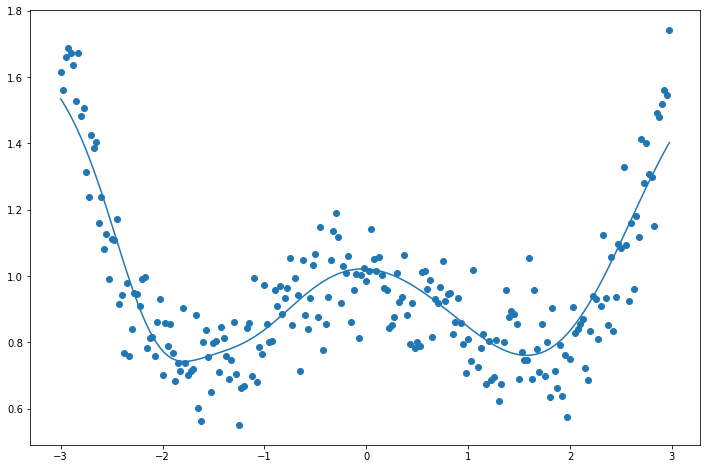

In [21]:
#推定
pred_y = model.predict(data_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(data_x, pred_y)